In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
from matplotlib_venn import venn2
from matplotlib_venn import venn3
#for my windows computer I had to install this package using pip rather than anaconda.  I got this error message: 
#twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other

In [2]:
##Compare LFC between last year and this year for AS + 1/NMPP1

#Load DEseq data for AS +/- drug

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_KL_AS_nmpp1.csv'), index_col=0)

#Load DEseq data from 2017 for AS +/-drug

pkainh_deseq_2017 = pd.read_csv(os.path.normpath(data_processing_dir + '\\20170817_klscpka\\20170817_klscpka_DESEQ_YPD_t40_ASMinvASPlus_KL.csv'), index_col=0)

pkainh_deseq_merged = pkainh_deseq.merge(pkainh_deseq_2017, left_index=True, right_index=True, how = 'outer', suffixes = ('','_2017')) 

#remove underscore from kl genenames
pkainh_deseq_merged['kl_genename'] = io_library.kl_genename_convert_list(list(pkainh_deseq_merged.index))
pkainh_deseq_merged.set_index('kl_genename', inplace=True)

#Add column for common names
pkainh_deseq_merged['SC_common_name'] = io_library.SC_common_name_lookup_KL(pkainh_deseq_merged.index)

for column in ['log2FoldChange', 'log2FoldChange_2017']: 
    pkainh_deseq_merged[column] = pkainh_deseq_merged[column].fillna(0.0)

In [24]:
pkainh_deseq_merged[pkainh_deseq_merged['SC_common_name']=='MSN4_MSN2']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,baseMean_2017,log2FoldChange_2017,lfcSE_2017,stat_2017,pvalue_2017,padj_2017,SC_common_name
kl_genename,,,,,,,,,,,,,
KLLA0F26961g,16.191836,-0.232485,0.604967,-0.384295,0.70076,0.779849,234.389096,0.757359,0.454249,1.667276,0.09546,0.176243,MSN4_MSN2


In [3]:
spec = 'KL'

data = []

xlabel = 'LFC AS -/+ Nmpp1 2017'
ylabel = 'LFC AS -/+ Nmpp1'

trace = pygo.Scatter(
            x = pkainh_deseq_merged['log2FoldChange_2017'], 
            y =  pkainh_deseq_merged['log2FoldChange'],
            text = pkainh_deseq_merged['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= spec + '_AS_pmNMPP1_2017LFC_V2018_UTR')

In [3]:
#Load DEseq data for K.Lac Rph1/Gis1 delete experiment

spec = 'KL'

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec + '_AS_wtVr1g1.csv'), index_col=0)

r1g1_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(r1g1_deseq.index))
r1g1_deseq.set_index('kl_genename', inplace=True)

r1g1_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(r1g1_deseq.index)

#Load DEseq data for KL Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec +  '_AS_m24del_nmpp1_interaction.csv'), index_col=0)

m24_nmpp1_int_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_nmpp1_int_deseq.index))
m24_nmpp1_int_deseq.set_index('kl_genename', inplace=True)

#Add column for common names
m24_nmpp1_int_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(m24_nmpp1_int_deseq.index)

#Load DEseq data for KL Msn2/4 delete in AS without drug

m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec + '_AS_wtVm24.csv'), index_col=0)
m24_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_deseq.index))
m24_deseq.set_index('kl_genename', inplace=True)

#Add column for common names
m24_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(m24_deseq.index)


#load Deseq data for KLac AS -/+ NMPP1
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_KL_AS_nmpp1.csv'), index_col=0)
pkainh_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(pkainh_deseq.index))
pkainh_deseq.set_index('kl_genename', inplace=True)

#Add column for common names
pkainh_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(pkainh_deseq.index)

coords = {}


In [6]:
#Call PKA inhibition genes above a line based on P.Value and LFC. 

x1,y1 = (2.0,15.0)
x2,y2 = (2.5,0.0)
ymin = 1.5

line_coords = [(x1,y1),(x2,y2),ymin]
coords['pkainh'] = line_coords

x_data = pkainh_deseq['log2FoldChange']
y_data =  -np.log10(pkainh_deseq['pvalue'])

pkainh_act_genes = pkainh_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]
len(pkainh_act_genes)

#Maybe this is too many? 

426

In [17]:
#Plot Deseq LFC v.s. pValue for AS +/- drug.  Get list of genes effected by PKA

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = pkainh_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_KL_AS_pmdrug')

In [9]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.3,8.0)
x2,y2 = (2.0,0.0)
ymin = 1.0

line_coords = [(x1,y1),(x2,y2),ymin]
coords['r1g1_rep'] = line_coords


x_data = r1g1_deseq['log2FoldChange']
y_data =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]
len(r1g1_rep_genes)

69

In [26]:
#Plot Deseq LFC v.s. pValue.  Rph1/Gis1 delete

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = r1g1_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_KL_WT_VS_R1G1')




In [10]:
#To Call Msn2/4 PKA interaction genes make a line and a hard cutoff for -log10p values

x1,y1 = (-2.5,0.0)
x2,y2 = (-1.1,2.5)
ymin = 0.5

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_nmpp1_act'] = line_coords

x_data = m24_nmpp1_int_deseq['log2FoldChange']
y_data =  -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]
len(m24_nmpp1_act_genes)

60

In [32]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue
line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_nmpp1_int_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename= spec + ' RNAseq2018_KL_Msn24_drug_interaction')


In [11]:
#To Call Msn2/4 deletion genes make a line  a hard cutoff for -log10p values. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-2.0,0.0)
x2,y2 = (-1.0,1.78)
ymin = 0.3

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_act'] = line_coords

x_data = m24_deseq['log2FoldChange']
y_data = -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]
len(m24_act_genes)

27

In [37]:
#Plot Deseq LFC v.s. pValue.  Msn2 activation alone

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename= 'RNAseq2018_AS_VS_M24_KL')


In [4]:
#Project Msn2/4 dependent genes onto PKA inhibition genes


#Compare PKA inhibition LFC to r1g1 activation

other_deseq= m24_nmpp1_int_deseq
other_name = 'm24_nmpp1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_KL_AS_nmpp1_'+other_name)


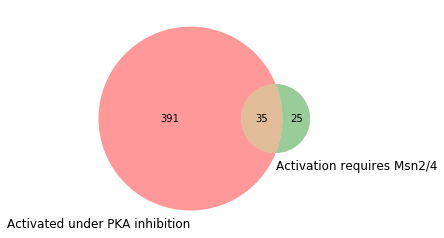

In [39]:
venn2([ set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])

In [5]:
#Compare PKA inhibition LFC to r1g1 activation

other_deseq= r1g1_deseq
other_name = 'r1g1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_KL_AS_nmpp1_'+other_name)

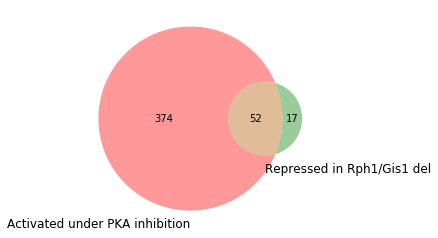

In [14]:
venn2([ set(pkainh_act_genes.index), set(r1g1_rep_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Repressed in Rph1/Gis1 del'])

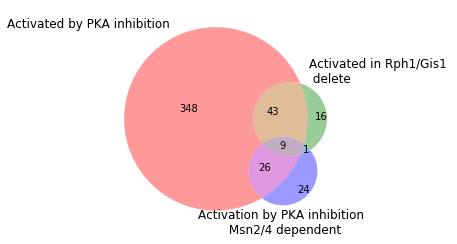

In [19]:
venn3([set(pkainh_act_genes.index),set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = ['Activated by PKA inhibition','Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent'])


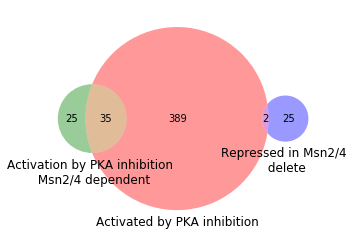

In [20]:
venn3([set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index),set(m24_act_genes.index) ], set_labels = ['Activated by PKA inhibition', 'Activation by PKA inhibition \n Msn2/4 dependent','Repressed in Msn2/4 \n delete'])

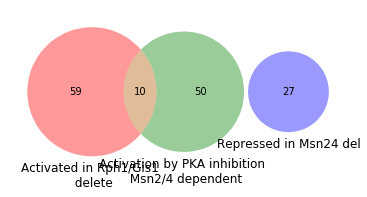

In [46]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Repressed in Msn24 del'])

In [15]:
#Print out the gene sets and put them into a dictionary - save the dictionary as a .pkl
#Repressed in Msn2/4 Delete basally

spec = 'KL'

target_sets = {'m24_nmpp1_act': set(m24_nmpp1_act_genes.index),
               'r1g1_rep': set(r1g1_rep_genes.index),
               'm24_act': set(m24_act_genes.index), 
               'pkainh_act' : set(pkainh_act_genes.index)}

fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181128_r1g1_m24_pka_targets_' + spec + '_high_thresh.pkl'

with open(fname, 'wb') as file:
    pickle.dump([target_sets, coords], file)


In [16]:
coords

{'m24_act': [(-2.0, 0.0), (-1.0, 1.78), 0.3],
 'pkainh': [(2.0, 15.0), (2.5, 0.0), 1.5],
 'r1g1_rep': [(1.3, 8.0), (2.0, 0.0), 1.0],
 'm24_nmpp1_act': [(-2.5, 0.0), (-1.1, 2.5), 0.5]}

In [18]:
#quickly print out names of target genes

print('Full Sets: \n')
for name, gene_set in target_sets.items():
    print(name + ', N_genes = ' + str(len(gene_set)) + ':')
    print(', '.join(list(io_library.SC_common_name_lookup_KL(gene_set))))
    print('\n')

print('Intersections: \n')

gene_set = target_sets['m24_nmpp1_act']-target_sets['r1g1_rep']
print('m24_nmpp1_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup_KL(gene_set))) + '\n')


gene_set = target_sets['r1g1_rep']-target_sets['m24_nmpp1_act']
print('r1g1_rep_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup_KL(gene_set)))+ '\n')


gene_set = target_sets['r1g1_rep'] & target_sets['m24_nmpp1_act']
print('r1g1_rep_and_m24_nmpp1_act, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup_KL(gene_set)))+ '\n')



Full Sets: 

m24_nmpp1_act, N_genes = 60:
CIC1, RME1, KLLA0B07315r, STE18, ATG40, KLLA0F25520g, INO1, KLLA0A02585g, PUS6, LEE1, KLLA0C19206g, YKL068W-A, PFK26, MOH1, FSH2, KLLA0F00682g, KLLA0F22341g, SPG4, YIL102C-A, YIL024C, KLLA0E22353r, MDH3, PSF3, KLLA0F07348g, COS111, YBR285W, KLLA0D18964g, KLLA0E00419g, KLLA0E15181g, EBG00000982198, RPL18B_RPL18A, KLLA0B01430r, PRM3, OSW5, KLLA0E02157g, KLLA0E22177g, KLLA0D11211r, SSA3_SSA4, UGX2, KLLA0A05987r, MDH2, KLLA0E12035g, KLLA0F05335g, GID7, KLLA0A04125g, GPA1, ECI1, INH1_STF1, KLLA0D03905g, KLLA0B06688r, YGL081W, KLLA0F16357r, ATG19, SPG1, KLLA0A05852g, EBG00000981736, PLB1_PLB3, KLLA0D11217r, FMP48, KLLA0E03741r


r1g1_rep, N_genes = 69:
APE1, SPS19, YOR289W, YEN1, IME1, SED1_SPI1, KLLA0C08085r, MRX3, FMP33, ATG9, KLLA0C19019g, YIL055C, SGA1, CHA1, YMR160W, KLLA0F25520g, PNC1, KLLA0C11121g, PFK26, ATG23, STE3, KLLA0B00451g, FMP45_YNL194C, KLLA0F00682g, GPH1, SPG4, SNN1, KLLA0E15005g, SRV2, ATG8, RDL1, YKL107W, YDR109C, YBR285W, CWP1, P

In [52]:
m24_nmpp1_int_deseq[m24_nmpp1_int_deseq['SC_common_name']=='CYC7_CYC1']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name
kl_genename,,,,,,,
KLLA0F16929g,180.042579,-1.032846,0.480011,-2.151712,0.03142,0.999491,CYC7_CYC1


In [23]:
io_library.SC_common_name_lookup_KL(r1g1_rep_genes.index)

['SGA1',
 'YHR112C',
 'YOR289W',
 'RFS1_PST2',
 'FMP33',
 'KLLA0C05016g',
 'ATG19',
 'IKS1',
 'RDL1',
 'KLLA0E10935g',
 'GPH1',
 'YNL200C',
 'YKL107W',
 'YMR160W',
 'FUN14',
 'KLLA0F05335g',
 'HUL4',
 'PFK26',
 'KLLA0A00220g',
 'PBI2',
 'FUS3',
 'KLLA0C19019g',
 'YDR461C-A',
 'YML020W',
 'NPC2',
 'ECM4',
 'MHO1',
 'CHA1',
 'PHM8_SDT1',
 'YJL132W',
 'KLLA0B00451g',
 'YDR109C',
 'KLLA0F00682g',
 'YNL195C_HBT1',
 'YET1_YET2',
 'KLLA0C19041g',
 'YBR285W',
 'ATG9',
 'FMP45_YNL194C',
 'SNN1',
 'ATG23',
 'ATG2',
 'PNC1',
 'YEN1',
 'APE1',
 'MRX3',
 'YHR202W',
 'PGC1',
 'DGA1',
 'YIL055C',
 'ATG8',
 'KLLA0F04125g',
 'SPS19',
 'CWP1',
 'MLS1',
 'SED1_SPI1',
 'UGX2',
 'SPG4',
 'KLLA0E15005g',
 'STE3',
 'YGL081W',
 'KLLA0F25520g',
 'SIP18_GRE1',
 'IME1',
 'EBG00000981672',
 'KLLA0C08085r',
 'KLLA0D11217r',
 'SRV2',
 'KLLA0C11121g']

In [18]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_act_genes.index)))

[]

In [19]:
io_library.SC_common_name_lookup_KL(list(set(r1g1_rep_genes.index) & set(m24_nmpp1_act_genes.index)))

['YGL081W',
 'SPG4',
 'ATG19',
 'YBR285W',
 'KLLA0F00682g',
 'PFK26',
 'KLLA0D11217r',
 'UGX2',
 'KLLA0F05335g',
 'KLLA0F25520g']

In [20]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) & set(m24_act_genes.index)))

[]

In [69]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) - set(m24_nmpp1_act_genes.index)))

['MFA1',
 'YKL068W-A',
 'YJL163C',
 'SDS24',
 'YGR066C',
 'AMS1',
 'HEF3',
 'GPM2',
 'XBP1',
 'SAF1',
 'TPK1',
 'UBP11',
 'tD(GUC)I1',
 'YPC1',
 'PBI2',
 'DDR48',
 'YNL092W',
 'GSP2',
 'MRPS12',
 'UGA2',
 'DDR2',
 'SHC1',
 'ATG7',
 'YTP1',
 'YOL153C',
 'SIP4',
 'YCR025C',
 'YGP1',
 'YLR366W',
 'YLR149C',
 'UGX2',
 'YCL012C',
 'HVG1',
 'YKR011C',
 'GPP2',
 'HYR1',
 'STF1',
 'YHR140W',
 'COQ11',
 'SDP1',
 'CYC7',
 'SDH6',
 'SGA1',
 'FMP48',
 'YER053C-A',
 'ULA1',
 'ATG34',
 'YRO2',
 'SOD2',
 'ATG33',
 'YCR061W',
 'RMR1',
 'PNS1',
 'YJL070C',
 'YGR174W-A',
 'TES1',
 'YIL100C-A',
 'GLK1',
 'RNY1',
 'HXT4',
 'YIL055C',
 'PNC1',
 'YHR180W-A']

In [47]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) - set(r1g1_rep_genes.index)))

['KLLA0E19317g',
 'KLLA0F27819g',
 'KLLA0E22177g',
 'KLLA0C19206g',
 'KLLA0F16357r',
 'KLLA0C05940g',
 'KLLA0A05987r',
 'KLLA0E07525g',
 'KLLA0D11211r',
 'KLLA0B09878g',
 'KLLA0D18964g',
 'KLLA0F25916g',
 'KLLA0E20527g',
 'KLLA0E06183g',
 'KLLA0E23079g',
 'KLLA0A07227g',
 'KLLA0F26686g',
 'KLLA0E01893g',
 'KLLA0F14553g',
 'KLLA0E11727g',
 'KLLA0F05511g',
 'KLLA0E00419g',
 'KLLA0A04125g',
 'KLLA0E22353r',
 'KLLA0F21846g',
 'KLLA0A02717g',
 'KLLA0C04686g',
 'KLLA0B01430r',
 'KLLA0E02157g',
 'KLLA0F07337g',
 'KLLA0A05852g',
 'KLLA0B07315r',
 'KLLA0A02387g',
 'KLLA0E03741r',
 'KLLA0C01177g',
 'KLLA0F22341g',
 'KLLA0D03905g',
 'KLLA0E05875g',
 'KLLA0E15181g',
 'KLLA0B06688r',
 'KLLA0D16412g',
 'KLLA0E12035g',
 'KLLA0C06996g',
 'EBG00000982198',
 'KLLA0A02585g',
 'KLLA0F07348g',
 'EBG00000981736',
 'KLLA0F17050g',
 'KLLA0A02629g',
 'KLLA0E15577g']

In [16]:
r1g1_m24int_merge.columns

Index(['baseMean_RGrep', 'log2FoldChange_RGrep', 'lfcSE_RGrep', 'stat_RGrep',
       'pvalue_RGrep', 'padj_RGrep', 'SC_common_name_RGrep',
       'baseMean_M24_act', 'log2FoldChange_M24_act', 'lfcSE_M24_act',
       'stat_M24_act', 'pvalue_M24_act', 'padj_M24_act',
       'SC_common_name_M24_act'],
      dtype='object')

In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    io_library.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.
